Here's a refined version of the markdown cell:

## Beginner's ML Course (2024)   
### Linear Regression Case Study: Predictive Analytics & Causal Analysis

[Watch the Course on YouTube](https://www.youtube.com/watch?v=bmmQA8A-yUA)

### Californian House Price Drivers:

- Identify Price Drivers
- Data Cleaning and Visualization
- Utilize Python Libraries
- Analyze House Value Factors
- Learn Data Science Hands-On Project Fundamentals

[Hands-On Project on Google Colab](https://colab.research.google.com/drive/16HdFVhvRq-DEmNU61Qp8YXMTA3CxUmg-?usp=sharing)

## Master Python Libraries

- pandas
- scikit-learn
- statsmodels
- matplotlib
- seaborn

## Enhance ML Portfolio

## Boost Your Confidence and Skills

- Step-by-Step ML/Data Science

## Steps:   

1. Problem Definition
2. Independent Variables
3. Dependent Variables
4. Required Python Libraries
5. Data Loading
6. Data Preprocessing
   - Missing Data Removal
   - Outlier Detection

## Data Visualization:

- Histogram, Box Plots, Scatter Plots
- Inter-Quartile Range (IQR)
- Percentiles, Quantiles
- Correlation Analysis
- Correlation Heatmaps
- String Variable Handling
- Dummy Variables

## Causal Analysis:

- Linear Regression with `statsmodels.api`
  - Interpreting Results
  - P-values, Statistical Significance
  - R-squared, Adjusted R-squared, F-Test, T-Test
- Linear Regression with `scikit-learn`
- Next Steps

## 1. Problem Definition
### What features define Californian House Prices?

## 2. Importing Python Libraries

### Brief Description of Each Library

- **pandas**: Used for data manipulation and analysis, pandas provides data structures like DataFrames that facilitate handling and analyzing data efficiently.

- **numpy**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **matplotlib**: A versatile plotting library for creating static, animated, and interactive visualizations in Python.

- **seaborn**: Built on top of matplotlib, seaborn offers a high-level interface for creating attractive and informative statistical graphics.

- **scipy.stats**: Contains numerous probability distributions and statistical functions for hypothesis testing and data analysis.

- **statsmodels**: Provides classes and functions for statistical modeling, hypothesis tests, and data exploration.

- **sklearn.linear_model**: Implements various linear regression models for predictive analysis in scikit-learn, a popular machine learning library in Python.

- **sklearn.model_selection**: Provides utilities for splitting datasets into training and testing sets, cross-validation, and parameter tuning.

By importing these libraries, we will be equipped to perform comprehensive data analysis, including data manipulation, visualization, statistical inference, and machine learning predictions.


In [1]:
# Data manipulation and analysis (Data Wrangling)
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis (for Causal Analysis)
import scipy.stats as stats
import statsmodels.api as sm                        

# Machine learning (for Predictive Analytics)
from sklearn.linear_model import LinearRegression   
from sklearn.model_selection import train_test_split

## 3. Loading California Housing Data

In [2]:
# Load data from CSV file
file_path = '../data/housing.csv'
df = pd.read_csv(file_path)
df.head()  # Display first few rows to verify loading

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Display the column names of the DataFrame
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
# Display the data types of each column in the DataFrame
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
# Display the first few rows of the DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Retrieve the unique values from the 'ocean_proximity' column
# The 'ocean_proximity' column contains 5 different categorical values.
# These categories might have a statistical impact on the 'median_house_value'.
unique_values = df['ocean_proximity'].unique()
unique_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# Display descriptive statistics for the DataFrame
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 4. Independant and Dependant Viariables 

### Independant Variables:  
- longtitude    
- latitude  
- housing_median_age    
- total_rooms   
- total_bedrooms    
- population    
- households    
- median_income 
- ocean_proximity   

### Dependant Variables
- median_house_value

## 5. Missing Data 
### Identifying and Removing Missing Data

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate Percentage of Missing Values in Each Column
# Consider to drop column or impute data if too high a percentage is missing
missing_percent = missing_values/len(df) * 100

# Display missing value statistics
print(f"Total rows and columns in dataframe: \n{df.shape}")
print(f"\nMissing values in each column: \n{missing_values}")
print(f"\nPercentage of missing data: \n{missing_percent}")


Total rows and columns in dataframe: 
(20640, 10)

Missing values in each column: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing data: 
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
# Remove rows with missing values
clean_df = df.dropna()

# Verify that missing values have been removed
print(f'\nMIssing values in each column after cleaning: \n{clean_df.isnull().sum()}')
print(f"\nRemaining and columns in dataframe: \n{clean_df.shape}")





MIssing values in each column after cleaning: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Remaining and columns in dataframe: 
(20433, 10)


## 6. Data Exploration and Visualization

In [11]:
# Display descriptive statistics for the DataFrame
clean_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


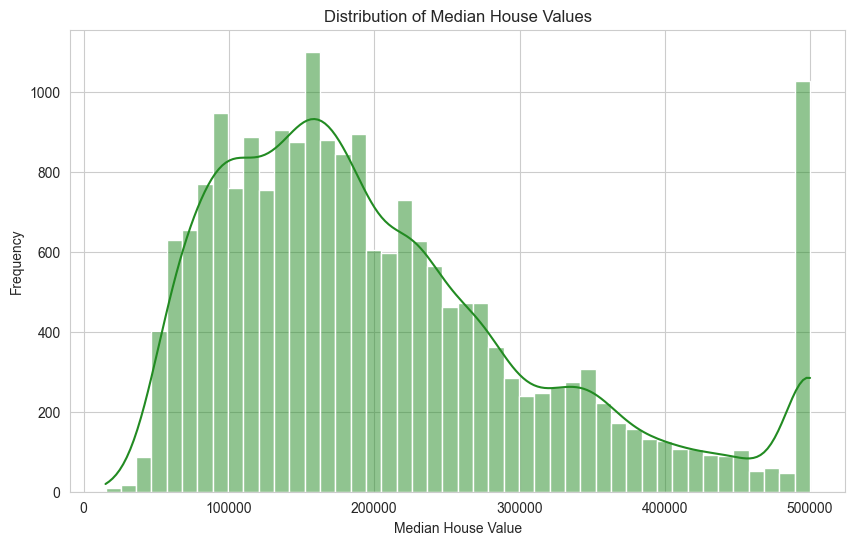

In [12]:
# Set the style of seaborn plots to 'whitegrid' or white bg with grid, for better aesthetics
sns.set_style('whitegrid')

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# *** This is the ONLY required line, the rest are for aesthetics!!!!  ***
# Plot a histogram of the 'median_house_value' column from the 'clean_df' DataFrame
# with a kernel density estimate (KDE) overlay in forest green color
sns.histplot(clean_df['median_house_value'], color='forestgreen', kde=True)

# Add a title to the plot
plt.title('Distribution of Median House Values')

# Label the x-axis
plt.xlabel('Median House Value')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


## Option 1: Using Inter-Quantile-Range (IQR) to Remove Outliers

In [13]:
# Assuming 'clean_df' is the dataset and 'median_house_value' is the target variable (column)

# Calculate the first quartile (Q1) of 'median_house_value'
Q1 = clean_df['median_house_value'].quantile(0.25)

# Calculate the third quartile (Q3) of 'median_house_value'
Q3 = clean_df['median_house_value'].quantile(0.75)

# Calculate the interquartile range (IQR) of 'median_house_value'
IQR = Q3 - Q1

# Define the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering 'median_house_value' within the defined bounds
no_outlier_df = clean_df[
    (clean_df['median_house_value'] >= lower_bound) &
    (clean_df['median_house_value'] <= upper_bound)
]

# Print the shape of the data before and after the removal of outliers
print(f'Shape BEFORE removal of outliers: {clean_df.shape}')
print(f'Shape AFTER removal of outliers: {no_outlier_df.shape}')


Shape BEFORE removal of outliers: (20433, 10)
Shape AFTER removal of outliers: (19369, 10)


## Option 2: Using Box Plots to Remove Outliers 

https://www.youtube.com/watch?v=Hm6Mra5XJSs

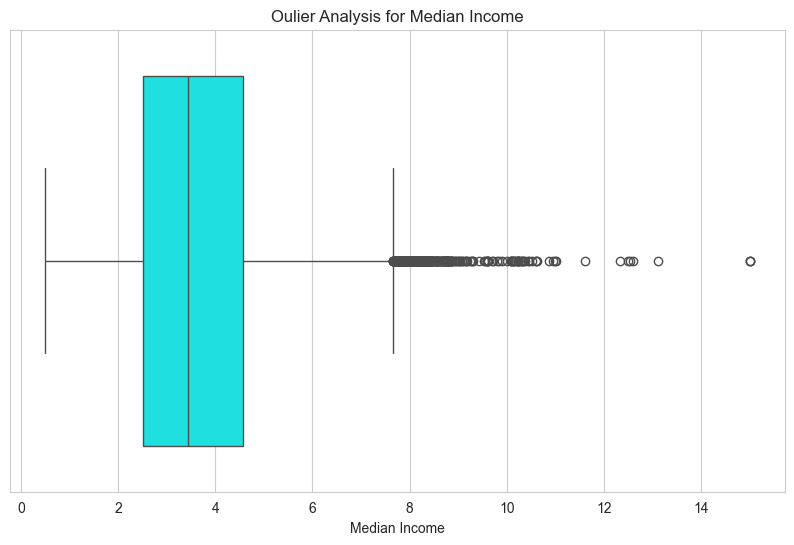

In [14]:
# We will find Ouliers in Median Income this time
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(x=no_outlier_df['median_income'], color='cyan')
plt.title("Oulier Analysis for Median Income")
plt.xlabel("Median Income")
plt.show()

In [15]:
# Calculate Q1, Q3 and IQR
Q1_Median_Income = clean_df['median_income'].quantile(0.25)
Q3_Median_Income = clean_df['median_income'].quantile(0.75)
IQR_Median_Income = Q3_Median_Income - Q1_Median_Income

# Define bounds for outliers
mi_lower_bound = Q1_Median_Income - 1.5*IQR_Median_Income
mi_upper_bound = Q3_Median_Income + 1.5*IQR_Median_Income

# Remove Outliers
mi_no_outliers = no_outlier_df[
    (no_outlier_df['median_income'] >= mi_lower_bound) &
    (no_outlier_df['median_income'] <= mi_upper_bound)
]

# Check Shape of Data after Operation
print (f'Shape of Data After Removing Median Housing Price Outlier: {no_outlier_df.shape}')
print (f'Shape of Data After Removing Median Income Outlier: {mi_no_outliers.shape}')


Shape of Data After Removing Median Housing Price Outlier: (19369, 10)
Shape of Data After Removing Median Income Outlier: (19149, 10)


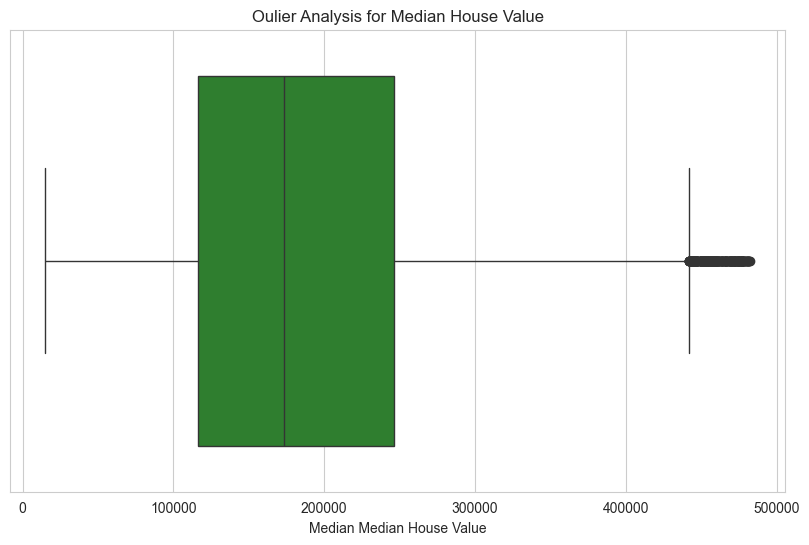

In [16]:
# And finally find Ouliers in Median House Prices
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(x=no_outlier_df['median_house_value'], color='forestgreen')
plt.title("Oulier Analysis for Median House Value")
plt.xlabel("Median Median House Value")
plt.show()

In [17]:
df = mi_no_outliers

## Correlation Analysis using HeatMap 

### Invesigate correlation of Independant Variables

### Conversion of String Variables to dummy variables


In [18]:
# Conversion of string variables to dummy variables

# Count and print the unique values for the 'ocean_proximity' column
# Add other categorical columns to the list if needed
for column in ['ocean_proximity']: 
    print(f"Unique values in {column}:", df[column].unique())

# Convert the 'ocean_proximity' column to dummy variables
# Each unique value in 'ocean_proximity' will be represented as a separate binary column
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean_proximity')

# Concatenate the original DataFrame (excluding the original 'ocean_proximity' column)
# with the new dummy variables DataFrame
df = pd.concat([df.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)

# Display the newly created dummy variables DataFrame
ocean_proximity_dummies


Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [19]:
# Dropping 'ocean_proximity_ISLAND' to avoid perfect multicollinearity
df = df.drop('ocean_proximity_ISLAND', axis=1)
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### Explanation of Code and Comments:

#### Count and Print Unique Values:

```python
for column in ['ocean_proximity']:           
    print(f"Unique values in {column}:", df[column].unique())   
```

- This loop iterates over the list of categorical columns (currently just 'ocean_proximity').
- It prints the unique values in the 'ocean_proximity' column to understand its categories.

#### Convert to Dummy Variables:

```python
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean_proximity')
```

- `pd.get_dummies` converts the 'ocean_proximity' column into dummy variables (one-hot encoding).
- Each unique value in 'ocean_proximity' becomes a new binary column, prefixed with 'ocean_proximity'.

#### Concatenate Original DataFrame with Dummy Variables:

```python
df = pd.concat([df.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
```

- This line drops the original 'ocean_proximity' column from the DataFrame.
- It then concatenates the remaining DataFrame with the new dummy variables DataFrame along columns (`axis=1`).

#### Display the Dummy Variables:

```python
ocean_proximity_dummies
```

- This displays the DataFrame containing the dummy variables for 'ocean_proximity'.
- These comments help explain each step of the process, making the code more understandable and easier to follow.


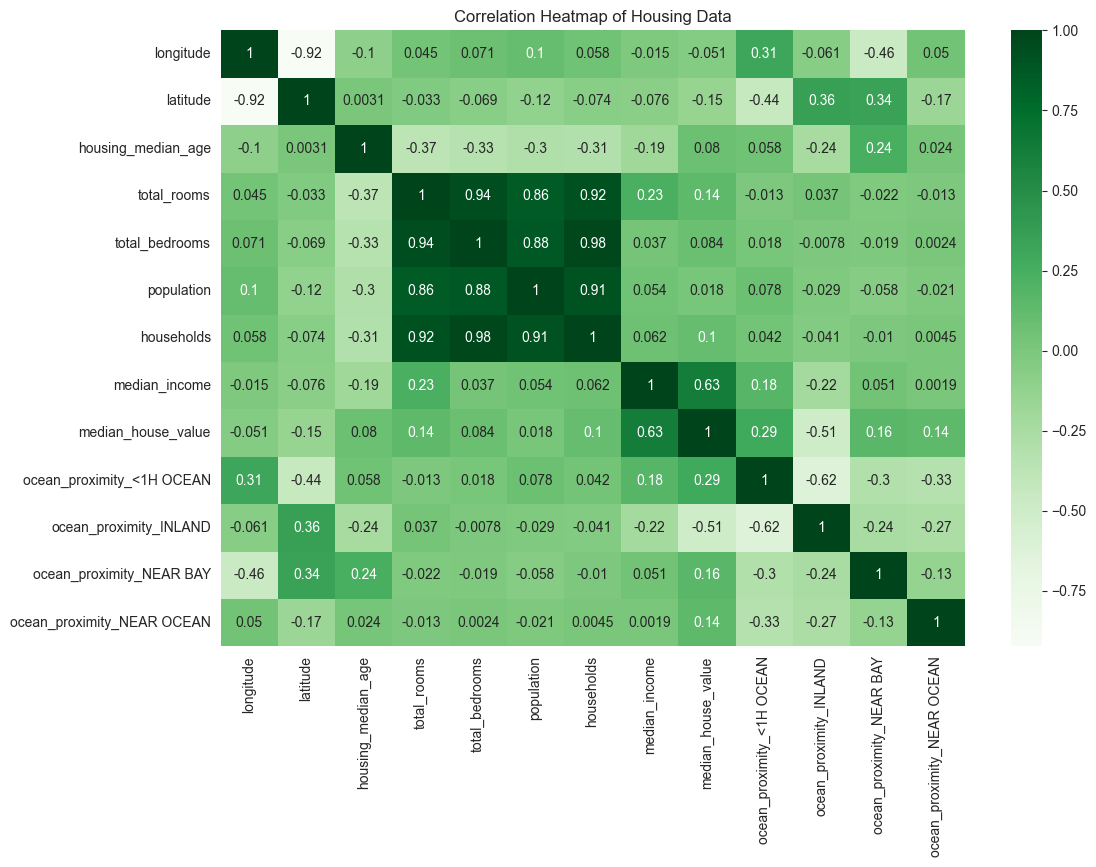

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [21]:
# Explanation of axis Parameter:
# axis=0: Refers to rows. This means the operation will be applied along rows.
# axis=1: Refers to columns. This means the operation will be applied along columns.

numerical_df = df.drop('total_bedrooms', axis=1)
numerical_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

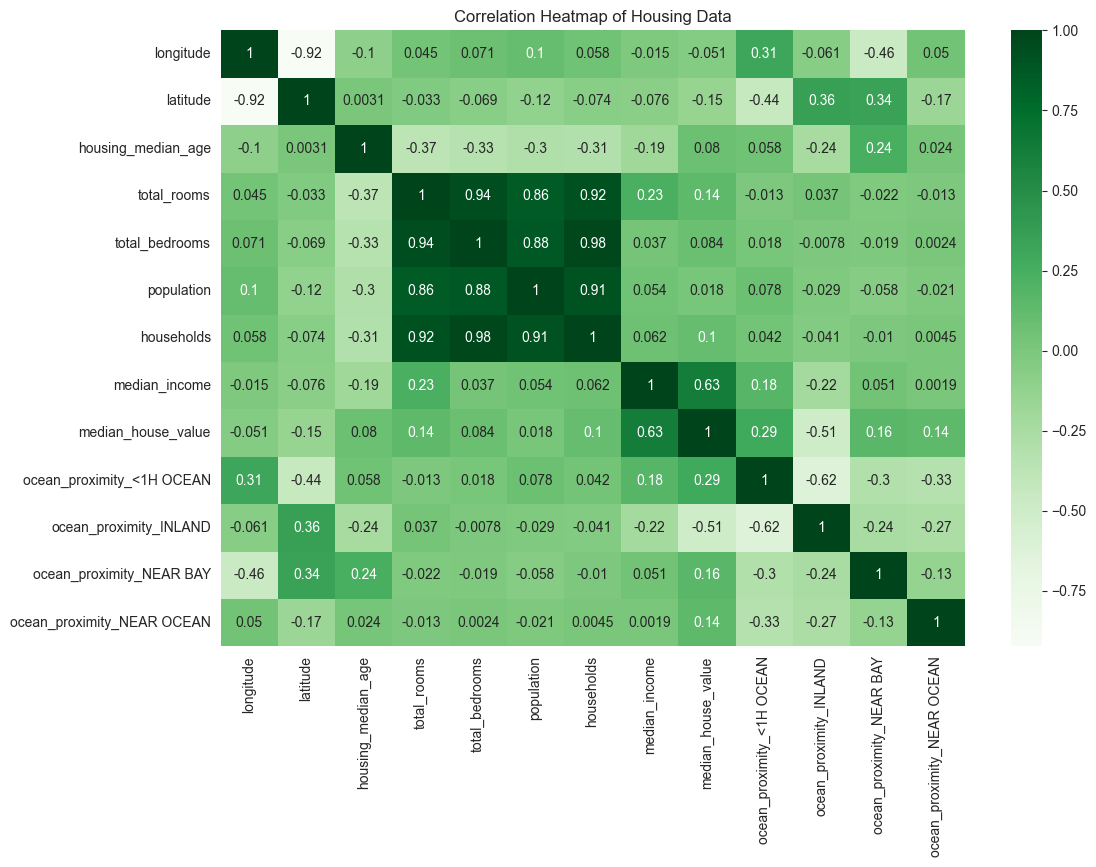

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False


## 7. Splitting Data into Tran and Test

In [24]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 
            'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = df[features]  # Features DataFrame
y = df[target]    # Target Series

# Split the data into a training set and a testing set
# `test_size` specifies the proportion of the data to be included in the test split
# `random_state` ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15319 samples
Test set size: 3830 samples


The `random_state` parameter in `train_test_split` function is used to ensure reproducibility of the data splitting process. Here's what it does:

- **Purpose**: `train_test_split` randomly shuffles the data and splits it into training and testing sets. The `random_state` parameter allows you to control this randomness.
  
- **Reproducibility**: By setting `random_state` to a specific number (e.g., `random_state=1111`), you ensure that every time you run the code with the same `random_state` value, you get the same random sequence of splits. This is particularly useful for debugging, testing, and ensuring consistent results across different runs.

- **Random Seed**: The number (`1111` in this case) acts as a seed for the random number generator. The same seed will always produce the same sequence of random numbers, hence the same split of data.

- **Usage**: It's a good practice to include `random_state` when splitting data, especially in machine learning tasks where the randomness of data splitting can affect model performance evaluation.

In summary, `random_state=1111` ensures that the data split into training and testing sets remains consistent across different runs of the code, providing reproducible results.

## 8. Training

In [25]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18996,-121.92,38.37,26.0,2056.0,933.0,367.0,2.7051,False,True,False,False
16847,-122.41,37.61,46.0,2975.0,1479.0,577.0,3.8214,False,False,False,True
9193,-119.53,37.34,26.0,4047.0,571.0,199.0,2.3482,False,True,False,False
10998,-117.80,33.76,27.0,2655.0,1017.0,335.0,6.9014,True,False,False,False
2998,-119.02,35.32,14.0,2927.0,1821.0,561.0,3.3529,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15264,-117.29,33.05,28.0,1146.0,672.0,292.0,3.1667,False,False,False,True
9566,-120.60,37.35,34.0,1722.0,904.0,315.0,2.4653,False,True,False,False
12532,-121.51,38.57,36.0,613.0,425.0,147.0,2.2031,False,True,False,False
2889,-118.99,35.39,52.0,2805.0,1325.0,522.0,2.5083,False,True,False,False


In [26]:
# Adding a constant (intercept) to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const # notice the 'const' column added


,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18996,1.0,-121.92,38.37,26.0,2056.0,933.0,367.0,2.7051,False,True,False,False
16847,1.0,-122.41,37.61,46.0,2975.0,1479.0,577.0,3.8214,False,False,False,True
9193,1.0,-119.53,37.34,26.0,4047.0,571.0,199.0,2.3482,False,True,False,False
10998,1.0,-117.80,33.76,27.0,2655.0,1017.0,335.0,6.9014,True,False,False,False
2998,1.0,-119.02,35.32,14.0,2927.0,1821.0,561.0,3.3529,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15264,1.0,-117.29,33.05,28.0,1146.0,672.0,292.0,3.1667,False,False,False,True
9566,1.0,-120.60,37.35,34.0,1722.0,904.0,315.0,2.4653,False,True,False,False
12532,1.0,-121.51,38.57,36.0,613.0,425.0,147.0,2.2031,False,True,False,False
2889,1.0,-118.99,35.39,52.0,2805.0,1325.0,522.0,2.5083,False,True,False,False


In [27]:
# cannot pass booleans to sm.OLS
X_train_const = X_train_const.astype(float)  # Convert all columns to float
X_train_const # notice the boolean colmuns are casted as floating point

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18996,1.0,-121.92,38.37,26.0,2056.0,933.0,367.0,2.7051,0.0,1.0,0.0,0.0
16847,1.0,-122.41,37.61,46.0,2975.0,1479.0,577.0,3.8214,0.0,0.0,0.0,1.0
9193,1.0,-119.53,37.34,26.0,4047.0,571.0,199.0,2.3482,0.0,1.0,0.0,0.0
10998,1.0,-117.80,33.76,27.0,2655.0,1017.0,335.0,6.9014,1.0,0.0,0.0,0.0
2998,1.0,-119.02,35.32,14.0,2927.0,1821.0,561.0,3.3529,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15264,1.0,-117.29,33.05,28.0,1146.0,672.0,292.0,3.1667,0.0,0.0,0.0,1.0
9566,1.0,-120.60,37.35,34.0,1722.0,904.0,315.0,2.4653,0.0,1.0,0.0,0.0
12532,1.0,-121.51,38.57,36.0,613.0,425.0,147.0,2.2031,0.0,1.0,0.0,0.0
2889,1.0,-118.99,35.39,52.0,2805.0,1325.0,522.0,2.5083,0.0,1.0,0.0,0.0



```python
# Adding a constant (intercept) to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const
```

In this code snippet:

- `sm.add_constant()` from statsmodels adds a constant column (intercept) to the `X_train` DataFrame.
- This addition of a constant term is necessary for certain statistical models like Ordinary Least Squares (OLS) regression in statsmodels, which require an explicit intercept term to be specified.
- The resulting `X_train_const` DataFrame includes the original predictors along with an added constant column.

In [28]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2071.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:45:05   Log-Likelihood:            -1.9008e+05
No. Observations:               15319   AIC:                         3.802e+05
Df Residuals:                   15307   BIC:                         3.803e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Certainly! Let's interpret the provided OLS Regression Results step by step:

### Interpretation of OLS Regression Results:

- **Dependent Variable (`Dep. Variable`)**: `median_house_value`
  - This is the target variable that the model aims to predict.

- **R-squared (`R-squared`)**:
  - R-squared measures the proportion of the variance in the dependent variable (`median_house_value`) that is explained by the independent variables. Here, R-squared is 0.598, indicating that approximately 59.8% of the variability in `median_house_value` is explained by the independent variables included in the model.

- **Adjusted R-squared (`Adj. R-squared`)**:
  - Adjusted R-squared adjusts the R-squared value to penalize for the number of predictors in the model. It is also 0.598 in this case, suggesting that the model's fit is stable and additional variables would not significantly improve the model's explanatory power.

- **F-statistic (`F-statistic`)**:
  - The F-statistic tests the overall significance of the regression model. A high F-statistic value (2071.0 here) with a very low probability (`Prob (F-statistic)` = 0.00) indicates that the overall regression model is statistically significant. This means that at least one of the independent variables is significantly related to `median_house_value`.

- **Coefficients (`coef`)**:
  - These are the estimated coefficients of the independent variables. Each coefficient represents the estimated change in the dependent variable (`median_house_value`) for a one-unit change in the corresponding independent variable, holding all other variables constant.

- **Interpretation of Coefficients**:
  - For instance, the coefficient for `longitude` is approximately `-23,300`. This suggests that for every one-unit increase in `longitude`, the predicted `median_house_value` decreases by approximately $23,300, assuming all other variables are held constant.

- **Standard Error (`std err`)**:
  - Standard errors measure the accuracy of the coefficient estimates. Lower standard errors indicate more precise estimates of the coefficients.

- **t-statistic (`t`) and p-value (`P>|t|`)**:
  - The t-statistic assesses the significance of each coefficient. The p-value (`P>|t|`) indicates the probability of observing such a large t-statistic if the null hypothesis (that the coefficient is zero) is true. A p-value less than 0.05 is generally considered statistically significant.

- **Confidence Interval (`[0.025   0.975]`)**:
  - The confidence interval provides a range within which we are confident the true coefficient value lies. For instance, the confidence interval for `longitude` ranges from approximately `-25,300` to `-21,300` at the 95% confidence level.

- **Covariance Type (`Covariance Type`)**:
  - Here, `nonrobust` indicates that standard errors are computed assuming homoscedasticity (equal variance) of errors. This is a typical assumption in ordinary least squares (OLS) regression.

- **Notes**:
  - Additional notes about the regression results, such as assumptions made or potential issues detected during the analysis.

- **Condition Number (`condition number`)**:
  - The condition number assesses the severity of multicollinearity in the model. A large condition number (7.68e+05 here) suggests potential strong multicollinearity among the independent variables. This can affect the stability and reliability of the coefficient estimates.

### Conclusion:
These regression results provide valuable insights into how well the model explains `median_house_value` based on the specified independent variables. Understanding these metrics helps in assessing the reliability and effectiveness of the regression model in predicting housing prices in the dataset.

Certainly! Here's the interpretation of all coefficients from the provided OLS Regression Results:

### Interpretation of Coefficients:

1. **const (Intercept)**: -1.808e+06
   - This represents the baseline median house value when all independent variables (`longitude`, `latitude`, `housing_median_age`, etc.) are zero. However, since latitude and longitude are geographic coordinates, their zero value isn't realistic in this context.

2. **longitude**: -2.33e+04
   - For every unit increase in longitude, holding all other variables constant, the median house value decreases by approximately $23,300.

3. **latitude**: -2.181e+04
   - For every unit increase in latitude, holding all other variables constant, the median house value decreases by approximately $21,810.

4. **housing_median_age**: 838.2094
   - For every one-unit increase in the median age of houses in the neighborhood, holding all other variables constant, the median house value increases by approximately $838.

5. **total_rooms**: -1.7887
   - For every additional room, holding all other variables constant, the median house value decreases by approximately $1.79.

6. **population**: -36.6252
   - For every additional person, holding all other variables constant, the median house value decreases by approximately $36.63.

7. **households**: 128.6622
   - For every additional household, holding all other variables constant, the median house value increases by approximately $128.66.

8. **median_income**: 3.596e+04
   - For every $1 increase in median income, holding all other variables constant, the median house value increases by approximately $35,960.

9. **ocean_proximity_<1H OCEAN**: -1.572e+05
   - Homes in areas labeled as `<1H OCEAN` have their median house value decreased by approximately $157,200 compared to homes in other ocean proximity categories, holding all other variables constant.

10. **ocean_proximity_INLAND**: -1.978e+05
    - Homes in inland areas have their median house value decreased by approximately $197,800 compared to homes in other ocean proximity categories, holding all other variables constant.

11. **ocean_proximity_NEAR BAY**: -1.657e+05
    - Homes near the bay have their median house value decreased by approximately $165,700 compared to homes in other ocean proximity categories, holding all other variables constant.

### Additional Notes:

- **R-squared (`R-squared`)** and **Adjusted R-squared (`Adj. R-squared`)**: Both are 0.598, indicating that 59.8% of the variance in `median_house_value` is explained by the model's independent variables.

- **F-statistic (`F-statistic`)**: The high value (2071.0) and low p-value (0.00) suggest that the overall regression model is statistically significant.

- **Standard Errors (`std err`)**: Measure the accuracy of coefficient estimates. Lower standard errors indicate more precise estimates.

- **Condition Number (`condition number`)**: The large value (7.68e+05) suggests potential strong multicollinearity among the independent variables, which can affect the stability of coefficient estimates.

These interpretations provide insights into how each independent variable contributes to predicting `median_house_value` in the dataset.

The standard error (`std err`) for each coefficient in the OLS Regression Results provides crucial information about the accuracy and precision of the coefficient estimates. Here's the interpretation of `std err` for all coefficients:

1. **const (Intercept)**: 9.18e+04
   - The standard error of the intercept coefficient is approximately $91,800. This indicates the typical amount of error or uncertainty associated with estimating the baseline `median_house_value` when all predictors are zero.

2. **longitude**: 1000.059
   - The standard error for `longitude` is approximately 1000.059. This suggests that there is some variability or uncertainty in the estimated effect of longitude on `median_house_value`. A lower standard error would indicate a more precise estimate.

3. **latitude**: 984.088
   - The standard error for `latitude` is approximately 984.088. Similar to `longitude`, this indicates the amount of uncertainty in the estimated effect of latitude on `median_house_value`.

4. **housing_median_age**: 44.739
   - The standard error for `housing_median_age` is approximately 44.739. This suggests that the estimate of how `housing_median_age` affects `median_house_value` has relatively low variability compared to other coefficients.

5. **total_rooms**: 0.708
   - The standard error for `total_rooms` is approximately 0.708. This suggests a relatively precise estimate of how `total_rooms` affects `median_house_value`.

6. **population**: 1.103
   - The standard error for `population` is approximately 1.103. This indicates that the estimate of how `population` affects `median_house_value` has relatively low variability.

7. **households**: 4.439
   - The standard error for `households` is approximately 4.439. This suggests a relatively precise estimate of how `households` affects `median_house_value`.

8. **median_income**: 417.620
   - The standard error for `median_income` is approximately 417.620. This indicates some variability in estimating how `median_income` affects `median_house_value`, though it's relatively low compared to other coefficients.

9. **ocean_proximity_<1H OCEAN**: 2.97e+04
   - The standard error for the coefficient associated with homes in `<1H OCEAN` proximity is approximately 29,700. This suggests significant uncertainty in estimating the effect of this category on `median_house_value`.

10. **ocean_proximity_INLAND**: 2.97e+04
    - The standard error for the coefficient associated with homes in `INLAND` proximity is approximately 29,700. This indicates significant uncertainty in estimating the effect of inland locations on `median_house_value`.

11. **ocean_proximity_NEAR BAY**: 2.97e+04
    - The standard error for the coefficient associated with homes near `BAY` proximity is approximately 29,700. This suggests significant uncertainty in estimating the effect of bay area locations on `median_house_value`.

### Summary:
- Lower standard errors indicate more precise coefficient estimates, while higher standard errors indicate more variability and uncertainty in the estimates. Understanding these errors helps in assessing the reliability of the regression coefficients and their significance in predicting `median_house_value` based on the provided dataset.

## 9. Prediction / Testing

In [29]:
# Adding a constant to the predictors for the test set (for intercept calculation)
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set using the fitted OLS model
test_predictions = model_fitted.predict(X_test_const)
test_predictions 


12668     99422.758763
4912     133869.370253
7994     233655.940431
3072      71256.009914
942      185337.042986
             ...      
13645     68791.193225
14122    163384.004208
3581     300307.982836
12890    139562.709753
1149      46312.373779
Length: 3830, dtype: object

The `test_predictions` you've shown appear to be a pandas Series containing predicted values for the median house prices (`median_house_value`) based on the test set data (`X_test`). Here's a breakdown of what this means:

- Each value in the Series represents a predicted median house value for a specific observation in your test set.
- The indices (`12668`, `4912`, `7994`, etc.) likely correspond to the indices of your original test dataset (`X_test`).
- For example:
  - The first prediction (`99422.758763`) corresponds to the prediction for the observation with index `12668` in your test set.
  - The second prediction (`133869.370253`) corresponds to the prediction for the observation with index `4912`, and so on.

These predicted values (`test_predictions`) are obtained by applying the trained OLS regression model (`model_fitted`) to the test set data (`X_test_const`). Each predicted value represents the model's estimation of the median house value based on the independent variables (`longitude`, `latitude`, `housing_median_age`, etc.) provided in `X_test`.

It's important to note that these predictions are point estimates generated by the model and can be used to evaluate how well your model generalizes to unseen data (the test set). Typically, you would compare these predicted values to the actual observed values (`y_test`) to assess the accuracy and performance of your regression model.

## 10. Checking OLS Assumptions
### Assumption 1: Linearity

- Comments: The relationship between the independent variables and the dependent variable should be linear. This can be checked using scatter plots of observed vs. predicted values and residual plots.    
- How to Check: 
Plot observed values against predicted values.  
Residuals vs. fitted values plot should show no clear pattern, suggesting linearity.

### Assumption 2: Random Sample

- Comments: The data should be collected through a random process to ensure that the sample is representative of the population.
- How to Check: 
Verify the data collection process to ensure randomness.    
Ensure there are no biases in the sampling method.  

### Assumption 3: Exogeneity

- Comments: The predictors should not be correlated with the error term. This means that the independent variables should not contain measurement errors or omitted variables that are correlated with the predictors.  
- How to Check: 
Examine potential omitted variable bias.
Use tests for endogeneity (e.g., Durbin-Wu-Hausman test).   

### Assumption 4: Homoskedasticity

- Comments: The variance of the error terms should be constant across all levels of the independent variables. This ensures that the model's predictions are equally reliable across all observations.  
- How to Check: 
Plot residuals against fitted values; the spread of residuals should be consistent across all levels of fitted values.
Conduct formal tests such as Breusch-Pagan or White's test to assess homoskedasticity.

### Assumption 1: Linearity

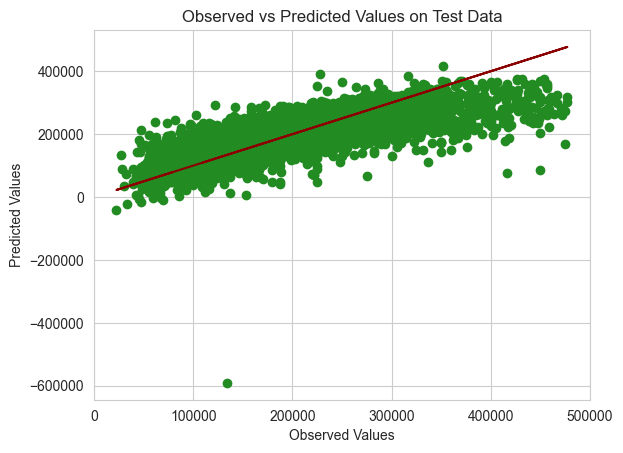

In [30]:
# Scatter plot comparing observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color="forestgreen")  # Scatter plot with observed vs predicted values
plt.xlabel('Observed Values')  # Label for x-axis
plt.ylabel('Predicted Values')  # Label for y-axis
plt.title('Observed vs Predicted Values on Test Data')  # Title of the plot
plt.plot(y_test, y_test, color='darkred')  # Line representing perfect prediction (where observed equals predicted)
plt.show()  # Display the plot


**Positive Linear Relationship:**
The red line in the scatter plot represents a perfect prediction line where observed values equal predicted values. The distribution of data points around this line suggests a positive linear relationship between the observed (`y_test`) and predicted (`test_predictions`) values. This indicates that as the actual values increase, the model tends to predict higher values as well, suggesting a good alignment between the model's predictions and the actual outcomes. It implies that the model captures the general trend of the data well, showing promise in its predictive capabilities.

### Assumption 2: Random Sample

In [31]:
# Calculate the mean of the residuals to check for randomness of data
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals, 2)}")


The mean of the residuals is 0.0


While we cannot directly observe the true errors in the model, we can 

1.   List item
2.   List item

work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

Explanation:
This code calculates the mean of the residuals (model_fitted.resid) from the fitted regression model. Checking the mean of residuals helps assess whether the model captures the data's overall pattern or if there are systematic deviations. A mean close to zero suggests that, on average, the model predictions are unbiased and residuals are randomly distributed around zero, indicating the model's appropriateness for the data.

While we cannot directly observe the true errors in the model, we can 

1.   List item
2.   List item

work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

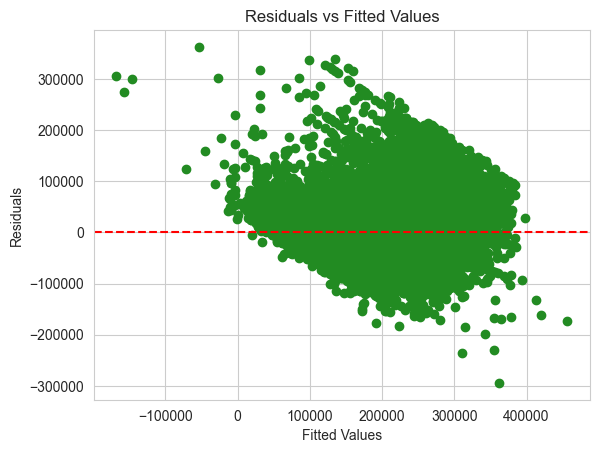

In [32]:
# Plotting residuals against fitted values to assess model performance
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color='red', linestyle='--')  # Line at zero to visualize where residuals are centered
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.







## Assumption 3: Exogeneity

In [33]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient, 2)}')


Correlation between residuals and longitude: 0.0
Correlation between residuals and latitude: -0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.0
Correlation between residuals and ocean_proximity_INLAND: -0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


This code calculates the residuals of the model and then checks for correlations between these residuals and each predictor variable. If any predictor shows a notable correlation with the residuals, it could indicate that the model assumptions are violated or that there are additional factors influencing the dependent variable that are not captured by the current predictors.
    
    Durbin-Wu-Hausman Test: For a more formal statistical test, use the Durbin-Wu-Hausman test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.

## Assumption 4: Homoskedasticty

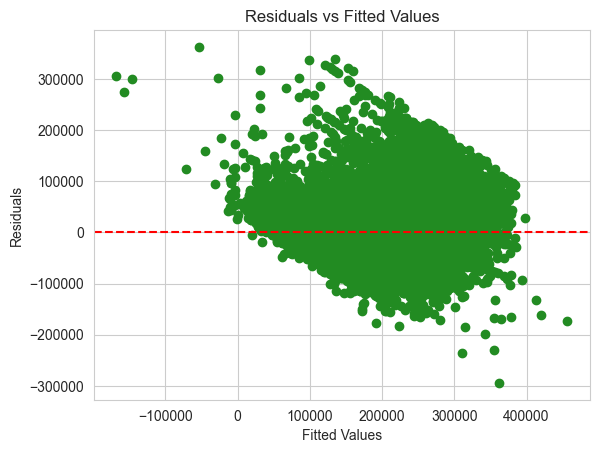

In [34]:
# Plotting the residuals against fitted values
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


#### Residuals Analysis:
- Random Scatter: A random scatter of residuals around the horizontal line at zero suggests homoscedasticity, where the variance of the residuals is consistent across all levels of the independent variables.     

- Pattern or Shape: If the residuals display a discernible pattern (such as a curve) or form a funnel shape where the spread widens or narrows with fitted values, this indicates heteroscedasticity. This suggests that the variance of residuals changes systematically with the level of the independent variables, potentially violating the assumption of constant variance (homoscedasticity) required for OLS regression.

## 11. Train/Test/Evaluation with Sklearn


### Scaling Your Data

In [35]:
### Scaling the Data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


#### Scaling the Data:
- StandardScaler Initialization: StandardScaler from sklearn.preprocessing is initialized to standardize features by removing the mean and scaling to unit variance.        

- Fit and Transform Training Data: The scaler is fitted on X_train to learn the mean and standard deviation of each feature, then transforms X_train accordingly.       

- Transform Test Data: X_test is transformed using the parameters learned from X_train, ensuring consistent scaling between training and test datasets to maintain model validity and performance.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create a Linear Regression model instance
lr = LinearRegression()

# Fit the model on the scaled training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')


RMSE on Test Set: 58685.50023423902


### Explanation:
- Linear Regression Model Initialization: An instance of LinearRegression from sklearn.linear_model is created to perform linear regression.

- Model Fitting: The lr model is fitted using the scaled training data X_train_scaled and y_train, where it learns the coefficients for the linear regression equation.

- Prediction: Using the fitted model (lr), predictions are made on the scaled test data X_test_scaled to obtain y_pred.

- Performance Evaluation: Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are computed using mean_squared_error from sklearn.metrics and sqrt from math, respectively, to evaluate the model's performance on the test set.

- Output: The RMSE metric is printed to evaluate how well the model predicts the target variable (y_test) on unseen data (X_test_scaled).

### Interpret RMSE:
- RMSE (Root Mean Squared Error): This metric measures the average magnitude of the residuals (or prediction errors) between predicted values (y_pred) and actual values (y_test) in the test set.          

- Interpretation: The RMSE value of approximately 58,685 indicates that, on average, the model's predictions deviate from the actual values by around $58,685. Lower RMSE values indicate better model performance, as they reflect smaller prediction errors and better fit of the model to the data.

In [37]:
# Print predicted values and actual values from the test set
print(y_pred)  # Predicted values by the model
print(y_test)  # Actual values from the test set


[[ 99422.75876262]
 [133869.37025319]
 [233655.94043108]
 ...
 [300307.98283584]
 [139562.70975343]
 [ 46312.37377927]]
       median_house_value
12668            109800.0
4912             114100.0
7994             212600.0
3072              67200.0
942              183300.0
...                   ...
13645             73100.0
14122             94100.0
3581             322200.0
12890            159700.0
1149              79500.0

[3830 rows x 1 columns]


#### Explanation:
- Print Predictions (y_pred): Outputs the predicted values of the target variable (y_pred) based on the model's predictions for the scaled test data (X_test_scaled).       

- Print Actual Values (y_test): Outputs the actual values of the target variable (y_test) from the test set, which serve as the ground truth against which the model predictions (y_pred) can be compared.